In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import pandas as pd
from scipy.optimize import curve_fit
import uncertainties
from uncertainties import ufloat
from uncertainties import unumpy

In [2]:
import os

# Change to the project directory
os.chdir('/home/ursuni/Research_Project')

# Confirm the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /home/ursuni/Research_Project


In [3]:
def get_param_arrays(filename):
    data = np.load(filename +'.npz', allow_pickle=True)
    
    popt_mbb = data['popt_mbb']
    pcov_mbb = data['pcov_mbb']
    popt_myy = data['popt_myy']
    pcov_myy = data['pcov_myy']
    
    data.close()

    return popt_mbb, pcov_mbb, popt_myy, pcov_myy

In [4]:
def get_N(popt, pcov):
    N = ufloat(popt[0], np.sqrt(pcov[0][0]))

    return N

In [5]:
def get_mu(popt, pcov, i):
    mu = ufloat(popt[i][0], np.sqrt(pcov[i][0][0]))

    return mu

In [6]:
def get_sigma(popt, pcov, i):
    sigma = ufloat(popt[i][1], np.sqrt(pcov[i][0][0]))
    return sigma

In [7]:
popt_mbb_Y0, pcov_mbb_Y0, popt_myy_Y0, pcov_myy_Y0 = get_param_arrays('Samples-Arrays/Y0-Arrays/Y0-Fitparams')

popt_mbb_Y1, pcov_mbb_Y1, popt_myy_Y1, pcov_myy_Y1 = get_param_arrays('Samples-Arrays/Y1-Arrays/Y1-Fitparams')

popt_mbb_Y2, pcov_mbb_Y2, popt_myy_Y2, pcov_myy_Y2 = get_param_arrays('Samples-Arrays/Y2-Arrays/Y2-Fitparams')

popt_mbb_Y3, pcov_mbb_Y3, popt_myy_Y3, pcov_myy_Y3 = get_param_arrays('Samples-Arrays/Y3-Arrays/Y3-Fitparams')

In [8]:
popt_mbb_Y3[5][0], pcov_mbb_Y3[5][0][0], get_mu(popt_myy_Y0, pcov_myy_Y0, 5)

(119469.70206730923,
 8082.602551855643,
 125097.78638321266+/-5.4356908856623525)

## Mean

### VBFHH

#### m$_{b\bar{b}}$

In [9]:
VBFHH_mbb_mu_Y0 = get_mu(popt_mbb_Y0, pcov_mbb_Y0, 0)
VBFHH_mbb_mu_Y1 = get_mu(popt_mbb_Y1, pcov_mbb_Y1, 0)
VBFHH_mbb_mu_Y2 = get_mu(popt_mbb_Y2, pcov_mbb_Y2, 0)
VBFHH_mbb_mu_Y3 = get_mu(popt_mbb_Y3, pcov_mbb_Y3, 0)

VBFHH_mbb_mu_arr = np.array([VBFHH_mbb_mu_Y0, VBFHH_mbb_mu_Y1, VBFHH_mbb_mu_Y2, VBFHH_mbb_mu_Y3])

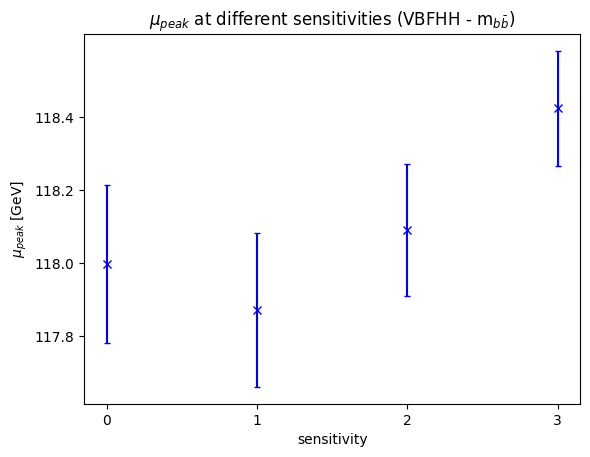

In [10]:
plt.title(r'$\mu_{peak}$ at different sensitivities (VBFHH - m$_{b\bar{b}}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
plt.yticks(np.linspace(117.4e3,118.4e3,6),(np.linspace(117.4e3,118.4e3,6)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\mu_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(VBFHH_mbb_mu_arr), yerr=unumpy.std_devs(VBFHH_mbb_mu_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/VBFHH_mbb_mu.pdf', format='pdf')

#### m$_{\gamma\gamma}$

In [11]:
VBFHH_myy_mu_Y0 = get_mu(popt_myy_Y0, pcov_myy_Y0, 0)
VBFHH_myy_mu_Y1 = get_mu(popt_myy_Y1, pcov_myy_Y1, 0)
VBFHH_myy_mu_Y2 = get_mu(popt_myy_Y2, pcov_myy_Y2, 0)
VBFHH_myy_mu_Y3 = get_mu(popt_myy_Y3, pcov_myy_Y3, 0)

VBFHH_myy_mu_arr = np.array([VBFHH_myy_mu_Y0, VBFHH_myy_mu_Y1, VBFHH_myy_mu_Y2, VBFHH_myy_mu_Y3])

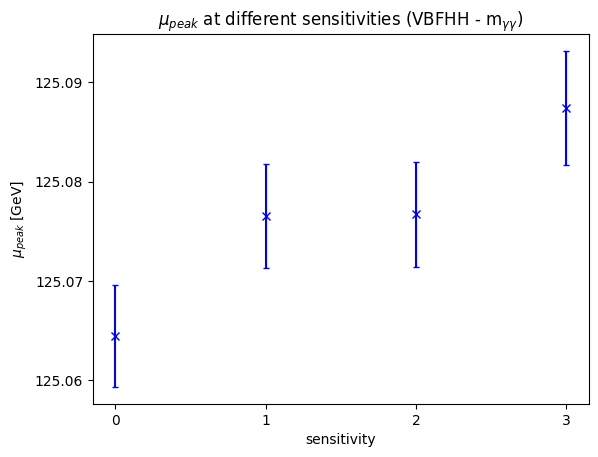

In [12]:
plt.title(r'$\mu_{peak}$ at different sensitivities (VBFHH - m$_{\gamma\gamma}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
plt.yticks(np.linspace(125.06e3,125.11e3,6),(np.linspace(125.06e3,125.11e3,6)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\mu_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(VBFHH_myy_mu_arr), yerr=unumpy.std_devs(VBFHH_myy_mu_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/VBFHH_myy_mu.pdf', format='pdf')

### ggFHH_kl1

#### m$_{b\bar{b}}$

In [13]:
ggFHH_kl1_mbb_mu_Y0 = get_mu(popt_mbb_Y0, pcov_mbb_Y0, 5)
ggFHH_kl1_mbb_mu_Y1 = get_mu(popt_mbb_Y1, pcov_mbb_Y1, 5)
ggFHH_kl1_mbb_mu_Y2 = get_mu(popt_mbb_Y2, pcov_mbb_Y2, 5)
ggFHH_kl1_mbb_mu_Y3 = get_mu(popt_mbb_Y3, pcov_mbb_Y3, 5)

ggFHH_kl1_mbb_mu_arr = np.array([ggFHH_kl1_mbb_mu_Y0, ggFHH_kl1_mbb_mu_Y1, ggFHH_kl1_mbb_mu_Y2, ggFHH_kl1_mbb_mu_Y3])

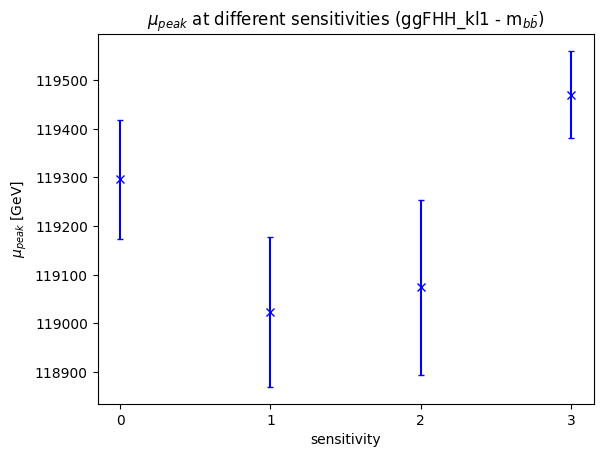

In [14]:
plt.title(r'$\mu_{peak}$ at different sensitivities (ggFHH_kl1 - m$_{b\bar{b}}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
#plt.yticks(np.linspace(117.4e3,118.4e3,6),(np.linspace(117.4e3,118.4e3,6)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\mu_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(ggFHH_kl1_mbb_mu_arr), yerr=unumpy.std_devs(ggFHH_kl1_mbb_mu_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/ggFHH_kl1_mbb_mu.pdf', format='pdf')

#### m$_{\gamma\gamma}$

In [15]:
ggFHH_kl1_myy_mu_Y0 = get_mu(popt_myy_Y0, pcov_myy_Y0, 5)
ggFHH_kl1_myy_mu_Y1 = get_mu(popt_myy_Y1, pcov_myy_Y1, 5)
ggFHH_kl1_myy_mu_Y2 = get_mu(popt_myy_Y2, pcov_myy_Y2, 5)
ggFHH_kl1_myy_mu_Y3 = get_mu(popt_myy_Y3, pcov_myy_Y3, 5)

ggFHH_kl1_myy_mu_arr = np.array([ggFHH_kl1_myy_mu_Y0, ggFHH_kl1_myy_mu_Y1, ggFHH_kl1_myy_mu_Y2, ggFHH_kl1_myy_mu_Y3])

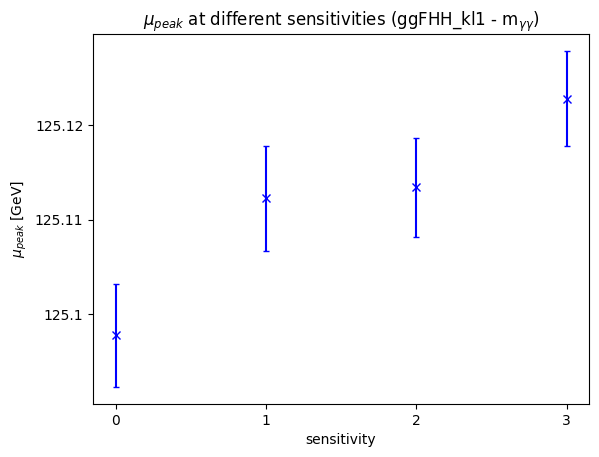

In [16]:
plt.title(r'$\mu_{peak}$ at different sensitivities (ggFHH_kl1 - m$_{\gamma\gamma}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
plt.yticks(np.linspace(125.1e3,125.2e3,11),(np.linspace(125.1e3,125.2e3,11)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\mu_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(ggFHH_kl1_myy_mu_arr), yerr=unumpy.std_devs(ggFHH_kl1_myy_mu_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/ggFHH_kl1_myy_mu.pdf', format='pdf')

## Sigma

### VBFHH

#### m$_{b\bar{b}}$

In [17]:
VBFHH_mbb_sig_Y0 = get_sigma(popt_mbb_Y0, pcov_mbb_Y0, 0)
VBFHH_mbb_sig_Y1 = get_sigma(popt_mbb_Y1, pcov_mbb_Y1, 0)
VBFHH_mbb_sig_Y2 = get_sigma(popt_mbb_Y2, pcov_mbb_Y2, 0)
VBFHH_mbb_sig_Y3 = get_sigma(popt_mbb_Y3, pcov_mbb_Y3, 0)

VBFHH_mbb_sig_arr = np.array([VBFHH_mbb_sig_Y0, VBFHH_mbb_sig_Y1, VBFHH_mbb_sig_Y2, VBFHH_mbb_sig_Y3])

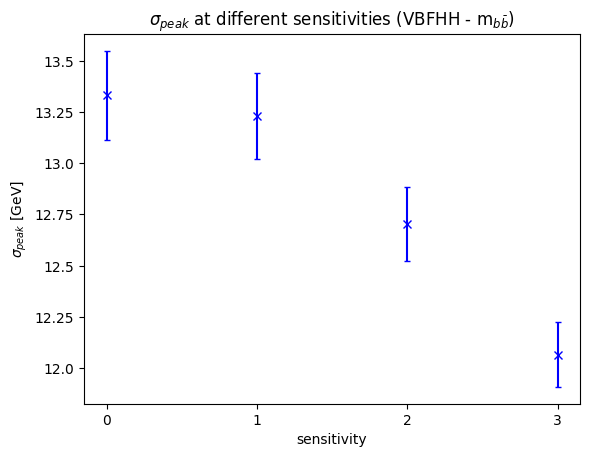

In [18]:
plt.title(r'$\sigma_{peak}$ at different sensitivities (VBFHH - m$_{b\bar{b}}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
plt.yticks(np.linspace(117.5e2,137.5e2,9),(np.linspace(117.5e2,137.5e2,9)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\sigma_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(VBFHH_mbb_sig_arr), yerr=unumpy.std_devs(VBFHH_mbb_sig_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/VBFHH_mbb_sig.pdf', format='pdf')

#### m$_{\gamma\gamma}$

In [19]:
VBFHH_myy_sig_Y0 = get_sigma(popt_myy_Y0, pcov_myy_Y0, 0)
VBFHH_myy_sig_Y1 = get_sigma(popt_myy_Y1, pcov_myy_Y1, 0)
VBFHH_myy_sig_Y2 = get_sigma(popt_myy_Y2, pcov_myy_Y2, 0)
VBFHH_myy_sig_Y3 = get_sigma(popt_myy_Y3, pcov_myy_Y3, 0)

VBFHH_myy_sig_arr = np.array([VBFHH_myy_sig_Y0, VBFHH_myy_sig_Y1, VBFHH_myy_sig_Y2, VBFHH_myy_sig_Y3])

#VBFHH_myy_sig_Y0

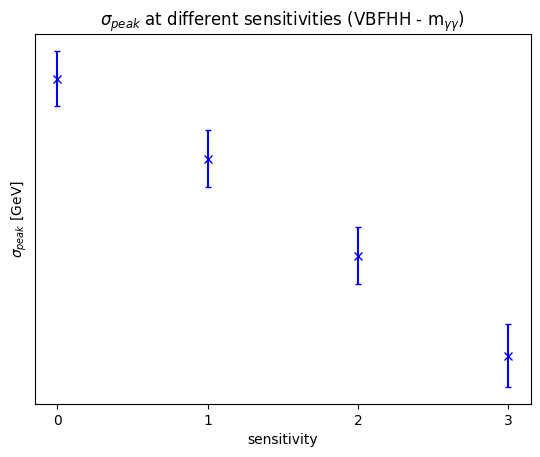

In [20]:
plt.title(r'$\sigma_{peak}$ at different sensitivities (VBFHH - m$_{\gamma\gamma}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
plt.yticks(np.linspace(1580,1650,8),(np.linspace(1580,1650,8)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\sigma_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(VBFHH_myy_sig_arr), yerr=unumpy.std_devs(VBFHH_myy_sig_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/VBFHH_myy_sig.pdf', format='pdf')

### ggFHH_kl1

#### m$_{b\bar{b}}$

In [21]:
ggFHH_kl1_mbb_sig_Y0 = get_sigma(popt_mbb_Y0, pcov_mbb_Y0, 5)
ggFHH_kl1_mbb_sig_Y1 = get_sigma(popt_mbb_Y1, pcov_mbb_Y1, 5)
ggFHH_kl1_mbb_sig_Y2 = get_sigma(popt_mbb_Y2, pcov_mbb_Y2, 5)
ggFHH_kl1_mbb_sig_Y3 = get_sigma(popt_mbb_Y3, pcov_mbb_Y3, 5)

ggFHH_kl1_mbb_sig_arr = np.array([ggFHH_kl1_mbb_sig_Y0, ggFHH_kl1_mbb_sig_Y1, ggFHH_kl1_mbb_sig_Y2, ggFHH_kl1_mbb_sig_Y3])

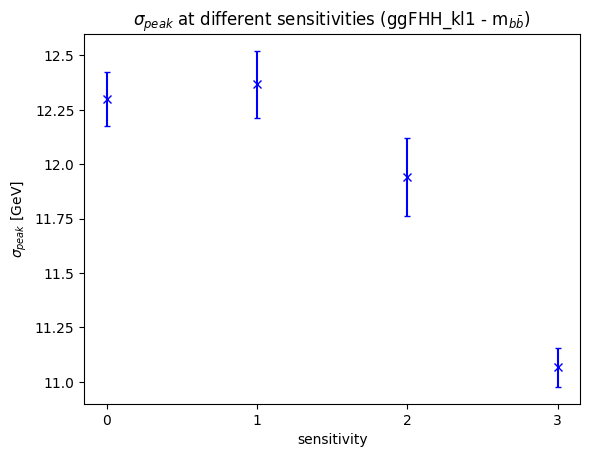

In [22]:
plt.title(r'$\sigma_{peak}$ at different sensitivities (ggFHH_kl1 - m$_{b\bar{b}}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
plt.yticks(np.linspace(11e3,12.75e3,8),(np.linspace(11e3,12.75e3,8)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\sigma_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(ggFHH_kl1_mbb_sig_arr), yerr=unumpy.std_devs(ggFHH_kl1_mbb_sig_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/ggFHH_kl1_mbb_sig.pdf', format='pdf')

#### m$_{\gamma\gamma}$

In [23]:
ggFHH_kl1_myy_sig_Y0 = get_sigma(popt_myy_Y0, pcov_myy_Y0, 5)
ggFHH_kl1_myy_sig_Y1 = get_sigma(popt_myy_Y1, pcov_myy_Y1, 5)
ggFHH_kl1_myy_sig_Y2 = get_sigma(popt_myy_Y2, pcov_myy_Y2, 5)
ggFHH_kl1_myy_sig_Y3 = get_sigma(popt_myy_Y3, pcov_myy_Y3, 5)

ggFHH_kl1_myy_sig_arr = np.array([ggFHH_kl1_myy_sig_Y0, ggFHH_kl1_myy_sig_Y1, ggFHH_kl1_myy_sig_Y2, ggFHH_kl1_myy_sig_Y3])

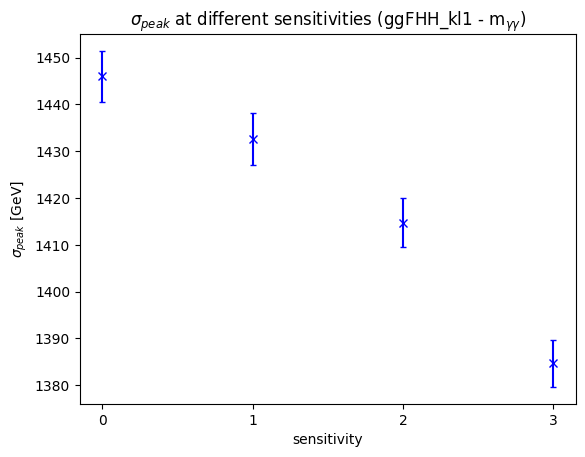

In [24]:
plt.title(r'$\sigma_{peak}$ at different sensitivities (ggFHH_kl1 - m$_{\gamma\gamma}$)')

plt.xticks([0,1,2,3],[0,1,2,3])
#plt.yticks(np.linspace(1440,1520,5),(np.linspace(1440,1520,5)/1e3).astype(float))

plt.xlabel('sensitivity')
plt.ylabel('$\sigma_{peak}$ [GeV]')

plt.errorbar(np.arange(0,4), unumpy.nominal_values(ggFHH_kl1_myy_sig_arr), yerr=unumpy.std_devs(ggFHH_kl1_myy_sig_arr),\
            ls='', marker='x', capsize=2, color='blue')

plt.savefig('Plots/Fitparameter-Comparisons/ggFHH_kl1_myy_sig.pdf', format='pdf')

## Normalization

In [25]:
popt_mbb_signal_Y0, pcov_mbb_signal_Y0, popt_myy_signal_Y0, pcov_myy_signal_Y0 = get_param_arrays('./Samples-Arrays/Y0-Arrays/Y0-Signalfit')

popt_mbb_signal_Y1, pcov_mbb_signal_Y1, popt_myy_signal_Y1, pcov_myy_signal_Y1 = get_param_arrays('./Samples-Arrays/Y1-Arrays/Y1-Signalfit')

popt_mbb_signal_Y2, pcov_mbb_signal_Y2, popt_myy_signal_Y2, pcov_myy_signal_Y2 = get_param_arrays('./Samples-Arrays/Y2-Arrays/Y2-Signalfit')

popt_mbb_signal_Y3, pcov_mbb_signal_Y3, popt_myy_signal_Y3, pcov_myy_signal_Y3 = get_param_arrays('./Samples-Arrays/Y3-Arrays/Y3-Signalfit')

In [26]:
print(get_N(popt_myy_signal_Y0[0], pcov_myy_signal_Y0[0]))

-1+/-12


In [27]:
signal_myy_N_Y0 = get_N(popt_myy_signal_Y0[0], pcov_myy_signal_Y0[0])
signal_myy_N_Y1 = get_N(popt_myy_signal_Y1[0], pcov_myy_signal_Y1[0])
signal_myy_N_Y2 = get_N(popt_myy_signal_Y2[0], pcov_myy_signal_Y2[0])
signal_myy_N_Y3 = get_N(popt_myy_signal_Y3[0], pcov_myy_signal_Y3[0])

signal_myy_N_arr = np.array([signal_myy_N_Y0, signal_myy_N_Y1, signal_myy_N_Y2, signal_myy_N_Y3])

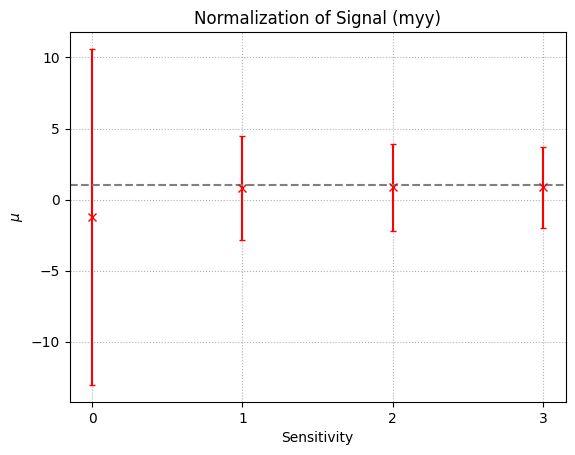

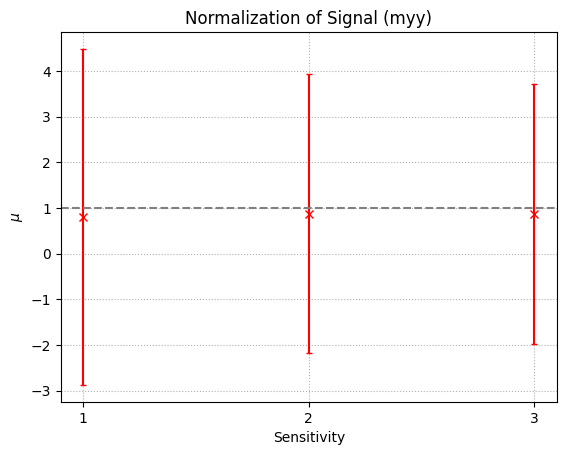

In [28]:
plt.title('Normalization of Signal (myy)')
plt.xlabel('Sensitivity')
plt.ylabel(r'$\mu$')

plt.xticks([0,1,2,3],[0,1,2,3])

plt.errorbar(np.arange(0,4), unumpy.nominal_values(signal_myy_N_arr), yerr=unumpy.std_devs(signal_myy_N_arr), ls='',\
            marker='x', capsize=2, color='red')

plt.grid(ls=':')
plt.axhline(1, ls='dashed', color='grey')

plt.savefig('NormalizationFactor-allY_myy.pdf', format='pdf')

plt.show()

plt.title('Normalization of Signal (myy)')
plt.xlabel('Sensitivity')
plt.ylabel(r'$\mu$')

plt.xticks([1,2,3],[1,2,3])

plt.errorbar(np.arange(1,4), unumpy.nominal_values(signal_myy_N_arr[1:]), yerr=unumpy.std_devs(signal_myy_N_arr[1:]), ls='',\
            marker='x', capsize=2, color='red')

plt.grid(ls=':')
plt.axhline(1, ls='dashed', color='grey')

plt.savefig('NormalizationFactor-Y>=1_myy.pdf', format='pdf')

In [29]:
signal_mbb_N_Y0 = get_N(popt_mbb_signal_Y0[0], pcov_mbb_signal_Y0[0])
signal_mbb_N_Y1 = get_N(popt_mbb_signal_Y1[0], pcov_mbb_signal_Y1[0])
signal_mbb_N_Y2 = get_N(popt_mbb_signal_Y2[0], pcov_mbb_signal_Y2[0])
signal_mbb_N_Y3 = get_N(popt_mbb_signal_Y3[0], pcov_mbb_signal_Y3[0])

signal_mbb_N_arr = np.array([signal_mbb_N_Y0, signal_mbb_N_Y1, signal_mbb_N_Y2, signal_mbb_N_Y3])

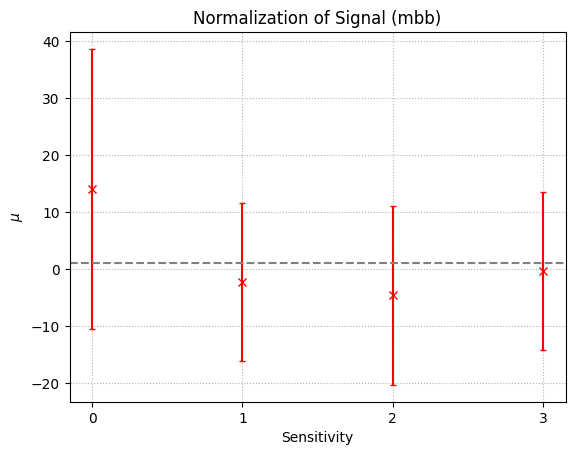

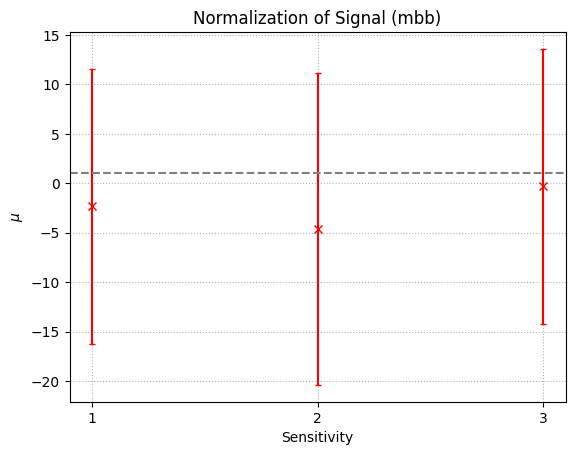

In [30]:
plt.title('Normalization of Signal (mbb)')
plt.xlabel('Sensitivity')
plt.ylabel(r'$\mu$')

plt.xticks([0,1,2,3],[0,1,2,3])

plt.errorbar(np.arange(0,4), unumpy.nominal_values(signal_mbb_N_arr), yerr=unumpy.std_devs(signal_mbb_N_arr), ls='',\
            marker='x', capsize=2, color='red')

plt.grid(ls=':')
plt.axhline(1, ls='dashed', color='grey')

plt.savefig('NormalizationFactor-allY_mbb.pdf', format='pdf')

plt.show()

plt.title('Normalization of Signal (mbb)')
plt.xlabel('Sensitivity')
plt.ylabel(r'$\mu$')

plt.xticks([1,2,3],[1,2,3])

plt.errorbar(np.arange(1,4), unumpy.nominal_values(signal_mbb_N_arr[1:]), yerr=unumpy.std_devs(signal_mbb_N_arr[1:]), ls='',\
            marker='x', capsize=2, color='red')

plt.grid(ls=':')
plt.axhline(1, ls='dashed', color='grey')

plt.savefig('NormalizationFactor-Y>=1_mbb.pdf', format='pdf')

## Normalization 2D

In [31]:
def get_param_2d_arrays(filename):
    data = np.load(filename +'.npz', allow_pickle=True)
    
    popt = data['popt']
    pcov = data['pcov']
    
    data.close()

    return popt, pcov

In [32]:
popt_signal_2d_Y0, pcov_signal_2d_Y0 = get_param_2d_arrays('./Samples-Arrays/Y0-Arrays/Y0-Signalfit_2D')

popt_signal_2d_Y1, pcov_signal_2d_Y1 = get_param_2d_arrays('./Samples-Arrays/Y1-Arrays/Y1-Signalfit_2D')

popt_signal_2d_Y2, pcov_signal_2d_Y2 = get_param_2d_arrays('./Samples-Arrays/Y2-Arrays/Y2-Signalfit_2D')

popt_signal_2d_Y3, pcov_signal_2d_Y3 = get_param_2d_arrays('./Samples-Arrays/Y3-Arrays/Y3-Signalfit_2D')

In [33]:
signal_2d_N_Y0 = get_N(popt_signal_2d_Y0, pcov_signal_2d_Y0)
signal_2d_N_Y1 = get_N(popt_signal_2d_Y1, pcov_signal_2d_Y1)
signal_2d_N_Y2 = get_N(popt_signal_2d_Y2, pcov_signal_2d_Y2)
signal_2d_N_Y3 = get_N(popt_signal_2d_Y3, pcov_signal_2d_Y3)

signal_2d_N_arr = np.array([signal_2d_N_Y0, signal_2d_N_Y1, signal_2d_N_Y2, signal_2d_N_Y3])

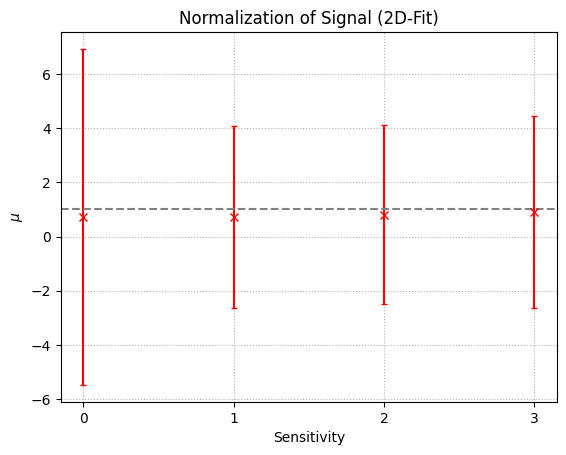

In [34]:
plt.title('Normalization of Signal (2D-Fit)')
plt.xlabel('Sensitivity')
plt.ylabel(r'$\mu$')

plt.xticks([0,1,2,3],[0,1,2,3])

plt.errorbar(np.arange(0,4), unumpy.nominal_values(signal_2d_N_arr), yerr=unumpy.std_devs(signal_2d_N_arr), ls='',\
            marker='x', capsize=2, color='red')

plt.grid(ls=':')
plt.axhline(1, ls='dashed', color='grey')

plt.savefig('NormalizationFactor-allY_2d.pdf', format='pdf')

plt.show()